# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score 
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data (COVIDdata.csv)

In [ ]:
#url = 'https://raw.githubusercontent.com/saadism777/Dataset-for-CSE445/main/COVIDdata.csv'
raw_df = pd.read_csv('COVIDdata.csv')

Shape of the raw data:-

In [ ]:
raw_df.shape

(10067, 135)

Description

In [ ]:
raw_df.head()

,Age,Age_grouping,Gender,Edu_qualification,Occupation,Study_Discipline,Residence_Districtwise,Residence_Divisionwise,Residence_Administrative,Marital_Status,...,district,division,GENDERCAT,Knowledge,BEH,LRFooD,LRCPANIC,LRQECOHARD,ECONIOMICAL_BURDEN,COMORB
0,29,2,2,5,7,2,1,3,4,2,...,0,1,2,19,12,3,3,3,9,0
1,22,2,1,5,5,2,2,7,4,1,...,0,1,1,16,16,1,3,1,5,1
2,30,3,2,5,7,2,1,3,4,2,...,0,1,2,17,17,1,3,3,7,0
3,21,2,1,5,5,2,3,1,1,1,...,0,0,1,18,17,3,3,1,7,0
4,24,2,1,5,5,2,4,2,1,1,...,0,0,1,17,18,3,3,3,9,0


Columns

In [ ]:
raw_df.columns

Index(['Age', 'Age_grouping', 'Gender', 'Edu_qualification', 'Occupation',
       'Study_Discipline', 'Residence_Districtwise', 'Residence_Divisionwise',
       'Residence_Administrative', 'Marital_Status',
       ...
       'district', 'division', 'GENDERCAT', 'Knowledge', 'BEH', 'LRFooD',
       'LRCPANIC', 'LRQECOHARD', 'ECONIOMICAL_BURDEN', 'COMORB'],
      dtype='object', length=135)

# Data Preprocessing

According to "The COVID-19 pandemic and serious psychological consequences in Bangladesh: A population-based nationwide study"

Participants who reported suicidal ideation were more likely to

1. be young, 
2. be female,
3. be alcohol users,
4. have higher illness comorbidity,
5. use social media more heavily,
6. have less knowledge about COVID-19,
7. engage in less preventive COVID-19 behaviors,
8. have insomnia problems.

**Dropping all other columns expect the one's mentioned above:**

In [ ]:
df = raw_df.drop(raw_df.columns.difference(['Age', 'Gender', 'Alcohol_Consumer','behavior','COMORB','Social_media_Frequency','Knowledge','ISI_CATEGORY','Suicide_related']), axis=1)
df = df[['Age', 'Gender', 'Alcohol_Consumer','behavior','COMORB','Social_media_Frequency','Knowledge','ISI_CATEGORY','Suicide_related']]

In [ ]:
df.head()

,Age,Gender,Alcohol_Consumer,behavior,COMORB,Social_media_Frequency,Knowledge,ISI_CATEGORY,Suicide_related
0,29,2,2,3.00,0,4,19,2,1
1,22,1,2,4.00,1,4,16,1,1
2,30,2,2,4.25,0,4,17,1,1
3,21,1,2,4.25,0,3,18,1,1
4,24,1,2,4.50,0,3,17,1,1


Shape after dropping. Now we have 9 columns

In [ ]:
df.shape

(10067, 9)

## Checking for duplicates

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10062     True
10063     True
10064     True
10065    False
10066    False
Length: 10067, dtype: bool

Counting Number of duplicates:

In [ ]:
df.duplicated().sum()

2022

Dropping duplicates:

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(8045, 9)

Checking the number of values for each feature

In [ ]:
for column in df:
    unique_vals = df[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Age :73
The number of values for feature Gender :3 -- ['2' '1' ' ']
The number of values for feature Alcohol_Consumer :2 -- [2 1]
The number of values for feature behavior :25
The number of values for feature COMORB :2 -- [0 1]
The number of values for feature Social_media_Frequency :5 -- ['4' '3' '1' '2' ' ']
The number of values for feature Knowledge :19
The number of values for feature ISI_CATEGORY :4 -- [2 1 3 4]
The number of values for feature Suicide_related :2 -- [1 2]


## Checking for null value

In [ ]:
df.isnull().sum()

Age                       0
Gender                    0
Alcohol_Consumer          0
behavior                  0
COMORB                    0
Social_media_Frequency    0
Knowledge                 0
ISI_CATEGORY              0
Suicide_related           0
dtype: int64

Null value count:

In [ ]:
df.isnull().sum().sum()

0

## Removing empty strings

In [ ]:
df = df[df.Age!= ' ']
df = df[df.Gender!=' ']
df = df[df.Social_media_Frequency!=' ']
df.shape

(7142, 9)

Checking number of values for each feature again:

In [ ]:
for column in df:
    unique_vals = df[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Age :60
The number of values for feature Gender :2 -- ['2' '1']
The number of values for feature Alcohol_Consumer :2 -- [2 1]
The number of values for feature behavior :24
The number of values for feature COMORB :2 -- [0 1]
The number of values for feature Social_media_Frequency :4 -- ['4' '3' '1' '2']
The number of values for feature Knowledge :19
The number of values for feature ISI_CATEGORY :4 -- [2 1 3 4]
The number of values for feature Suicide_related :2 -- [1 2]


features data types:

In [ ]:
df.dtypes

Age                        object
Gender                     object
Alcohol_Consumer            int64
behavior                  float64
COMORB                      int64
Social_media_Frequency     object
Knowledge                   int64
ISI_CATEGORY                int64
Suicide_related             int64
dtype: object

## Converting strings to integers

In [ ]:
df.Gender = pd.to_numeric(df.Gender)
df.Age = pd.to_numeric(df.Age)
df.Social_media_Frequency = pd.to_numeric(df.Social_media_Frequency)


All are integers and floats now:

In [ ]:
df.dtypes

Age                         int64
Gender                      int64
Alcohol_Consumer            int64
behavior                  float64
COMORB                      int64
Social_media_Frequency      int64
Knowledge                   int64
ISI_CATEGORY                int64
Suicide_related             int64
dtype: object

## Swapping numerical values with Meaningful values from the dataset supplementary

In [ ]:
df_visu = df.copy()

Do you consume alcohol?
1.	Yes
2.	No

In [ ]:
yes_no_columns = ['Alcohol_Consumer']
for col in yes_no_columns:
    df[col].replace({2:'No', 1: 'Yes'},inplace=True)

Gender
1.	Male 
2.	Female


In [ ]:
CAT_COL = ['Gender']
for col in CAT_COL:
    df[col].replace({2:'Female', 1: 'Male'},inplace=True)

social media, what is the frequency of its use?
1.	More than 4 days a week 
2.	2/3 days a week
3.	Everyday
4.	Several times a day


In [ ]:
CAT_COL = ['Social_media_Frequency']
for col in CAT_COL:
    df[col].replace({1:'More than 4 days a week', 2: '2/3 days a week', 3:'Everday', 4:'Several times a day'},inplace=True)

severity of your insomnia problem(s) using a 5-point Likert scale: 0. None 1. Mild 2. Moderate 3. Severe 4. Very severe

In [ ]:
CAT_COL = ['ISI_CATEGORY']
for col in CAT_COL:
    df[col].replace({1:'Mild', 2: 'Moderate', 3:'Severe', 4:'Very Severe'},inplace=True)

Binary question If the participant had Comorbidity (Multiple diseases at the same time)

In [ ]:
yes_no_columns = ['COMORB']
for col in yes_no_columns:
    df[col].replace({1:'Yes', 0: 'No'},inplace=True)

In [ ]:
yes_no_columns = ['Suicide_related']
for col in yes_no_columns:
    df[col].replace({2:'Yes', 1: 'No'},inplace=True)

In [ ]:
df.shape

(7142, 9)

In [ ]:
df.head()

,Age,Gender,Alcohol_Consumer,behavior,COMORB,Social_media_Frequency,Knowledge,ISI_CATEGORY,Suicide_related
0,29,Female,No,3.00,No,Several times a day,19,Moderate,No
1,22,Male,No,4.00,Yes,Several times a day,16,Mild,No
2,30,Female,No,4.25,No,Several times a day,17,Mild,No
3,21,Male,No,4.25,No,Everday,18,Mild,No
4,24,Male,No,4.50,No,Everday,17,Mild,No


## One hot encoding the categorial values

In [ ]:
onehot_df = pd.get_dummies(data=df, columns=['Social_media_Frequency','ISI_CATEGORY','Alcohol_Consumer','COMORB','Gender'])

In [ ]:
onehot_df.shape

(7142, 18)

In [ ]:
onehot_df.head()

,Age,behavior,Knowledge,Suicide_related,Social_media_Frequency_2/3 days a week,Social_media_Frequency_Everday,Social_media_Frequency_More than 4 days a week,Social_media_Frequency_Several times a day,ISI_CATEGORY_Mild,ISI_CATEGORY_Moderate,ISI_CATEGORY_Severe,ISI_CATEGORY_Very Severe,Alcohol_Consumer_No,Alcohol_Consumer_Yes,COMORB_No,COMORB_Yes,Gender_Female,Gender_Male
0,29,3.00,19,No,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,22,4.00,16,No,0,0,0,1,1,0,0,0,1,0,0,1,0,1
2,30,4.25,17,No,0,0,0,1,1,0,0,0,1,0,1,0,1,0
3,21,4.25,18,No,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,24,4.50,17,No,0,1,0,0,1,0,0,0,1,0,1,0,0,1


In [ ]:
df.head()

,Age,Gender,Alcohol_Consumer,behavior,COMORB,Social_media_Frequency,Knowledge,ISI_CATEGORY,Suicide_related
0,29,Female,No,3.00,No,Several times a day,19,Moderate,No
1,22,Male,No,4.00,Yes,Several times a day,16,Mild,No
2,30,Female,No,4.25,No,Several times a day,17,Mild,No
3,21,Male,No,4.25,No,Everday,18,Mild,No
4,24,Male,No,4.50,No,Everday,17,Mild,No


# Data Visualization

## Pairplot

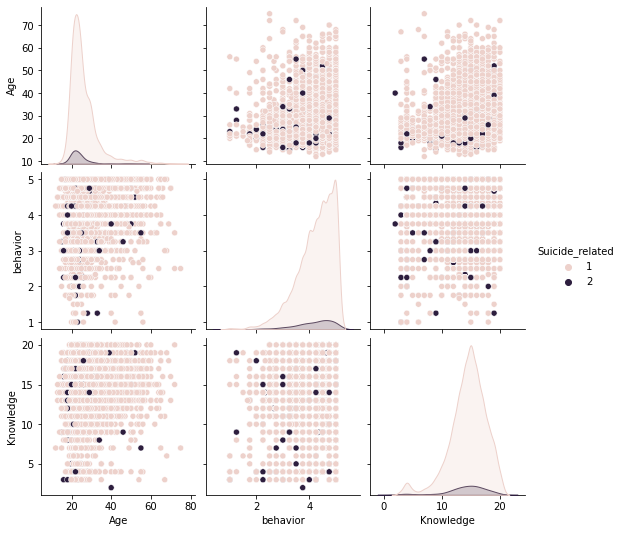

In [ ]:
df2 = df_visu
temp_data = df2.drop(df2.columns.difference(['Age','behavior','Knowledge','Suicide_related']), axis=1)
g = sns.pairplot(temp_data, hue = 'Suicide_related') 

## Correlation

In [ ]:
onehot_df.corr()

,Age,behavior,Knowledge,Social_media_Frequency_2/3 days a week,Social_media_Frequency_Everday,Social_media_Frequency_More than 4 days a week,Social_media_Frequency_Several times a day,ISI_CATEGORY_Mild,ISI_CATEGORY_Moderate,ISI_CATEGORY_Severe,ISI_CATEGORY_Very Severe,Alcohol_Consumer_No,Alcohol_Consumer_Yes,COMORB_No,COMORB_Yes,Gender_Female,Gender_Male
Age,1.000000,0.010130,0.048076,0.161880,-0.014428,0.033063,-0.064233,0.050894,-0.006022,-0.052790,-0.018468,0.001898,-0.001898,-0.236439,0.236439,-0.092353,0.092353
behavior,0.010130,1.000000,0.056362,0.013723,0.038119,-0.003765,-0.041938,-0.008183,-0.016744,0.018474,0.027850,0.080554,-0.080554,0.044674,-0.044674,0.137467,-0.137467
Knowledge,0.048076,0.056362,1.000000,-0.032230,-0.096334,-0.061423,0.132546,-0.009349,-0.023905,0.041649,0.003686,-0.002724,0.002724,0.019757,-0.019757,0.014539,-0.014539
Social_media_Frequency_2/3 days a week,0.161880,0.013723,-0.032230,1.000000,-0.186344,-0.042811,-0.204354,0.050349,-0.024128,-0.040073,0.003532,-0.013154,0.013154,-0.052060,0.052060,0.001624,-0.001624
Social_media_Frequency_Everday,-0.014428,0.038119,-0.096334,-0.186344,1.000000,-0.177610,-0.847808,0.032263,0.012612,-0.030992,-0.057691,0.017947,-0.017947,0.014509,-0.014509,-0.039501,0.039501
Social_media_Frequency_More than 4 days a week,0.033063,-0.003765,-0.061423,-0.042811,-0.177610,1.000000,-0.194776,0.035516,0.003616,-0.041421,-0.023534,0.011651,-0.011651,-0.005127,0.005127,-0.012011,0.012011
Social_media_Frequency_Several times a day,-0.064233,-0.041938,0.132546,-0.204354,-0.847808,-0.194776,1.000000,-0.066252,-0.004127,0.063112,0.064962,-0.016998,0.016998,0.008725,-0.008725,0.043209,-0.043209
ISI_CATEGORY_Mild,0.050894,-0.008183,-0.009349,0.050349,0.032263,0.035516,-0.066252,1.000000,-0.668878,-0.420066,-0.188288,-0.003846,0.003846,0.080153,-0.080153,-0.106388,0.106388
ISI_CATEGORY_Moderate,-0.006022,-0.016744,-0.023905,-0.024128,0.012612,0.003616,-0.004127,-0.668878,1.000000,-0.295833,-0.132603,-0.001634,0.001634,-0.027846,0.027846,0.022972,-0.022972
ISI_CATEGORY_Severe,-0.052790,0.018474,0.041649,-0.040073,-0.030992,-0.041421,0.063112,-0.420066,-0.295833,1.000000,-0.083277,0.004968,-0.004968,-0.061216,0.061216,0.089075,-0.089075


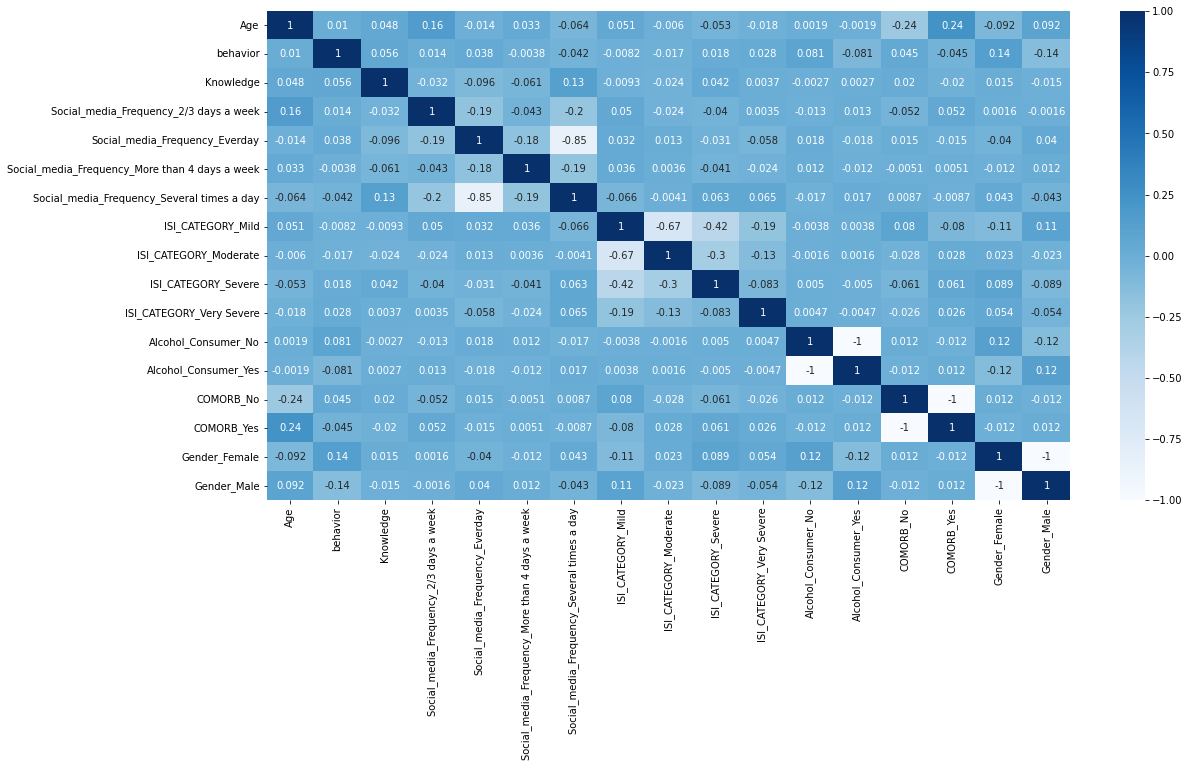

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(onehot_df.corr(),annot = True,cmap ="Blues")

## Barplot

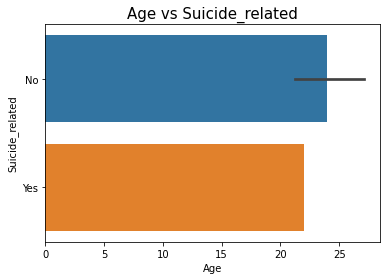

In [ ]:
sns.barplot(x="Age", y="Suicide_related",data=df[140:150])
plt.title("Age vs Suicide_related",fontsize=15)
plt.xlabel("Age")
plt.ylabel("Suicide_related")
plt.show()
plt.style.use("ggplot")

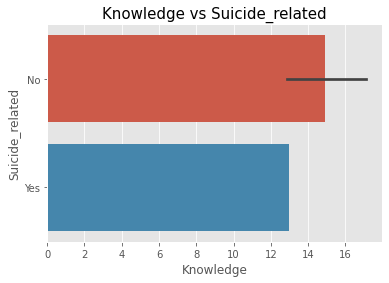

In [ ]:
sns.barplot(x="Knowledge", y="Suicide_related", data=df[140:150])
plt.title("Knowledge vs Suicide_related",fontsize=15)
plt.xlabel("Knowledge")
plt.ylabel("Suicide_related")
plt.show()
plt.style.use("ggplot")

## Histogram

In [ ]:
df_visu.head()

,Age,Gender,Alcohol_Consumer,behavior,COMORB,Social_media_Frequency,Knowledge,ISI_CATEGORY,Suicide_related
0,29,2,2,3.00,0,4,19,2,1
1,22,1,2,4.00,1,4,16,1,1
2,30,2,2,4.25,0,4,17,1,1
3,21,1,2,4.25,0,3,18,1,1
4,24,1,2,4.50,0,3,17,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19ccd65d0>,
      dtype=object)

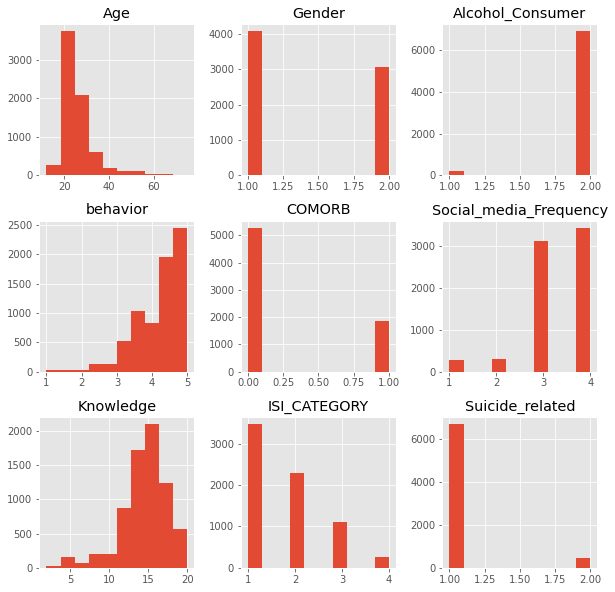

In [ ]:
df_visu.hist(figsize=(10,10),bins=10)

In [ ]:
onehot_df.describe()

,Age,behavior,Knowledge,Social_media_Frequency_2/3 days a week,Social_media_Frequency_Everday,Social_media_Frequency_More than 4 days a week,Social_media_Frequency_Several times a day,ISI_CATEGORY_Mild,ISI_CATEGORY_Moderate,ISI_CATEGORY_Severe,ISI_CATEGORY_Very Severe,Alcohol_Consumer_No,Alcohol_Consumer_Yes,COMORB_No,COMORB_Yes,Gender_Female,Gender_Male
count,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000
mean,25.873285,4.220935,14.445813,0.042985,0.436012,0.039205,0.481798,0.487118,0.320218,0.156679,0.035984,0.968496,0.031504,0.739709,0.260291,0.429432,0.570568
std,7.386222,0.692072,3.145951,0.202838,0.495923,0.194095,0.499704,0.499869,0.466593,0.363523,0.186264,0.174687,0.174687,0.438824,0.438824,0.495030,0.495030
min,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.750000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,4.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,28.000000,4.750000,17.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,75.000000,5.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Boxplot

In [ ]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

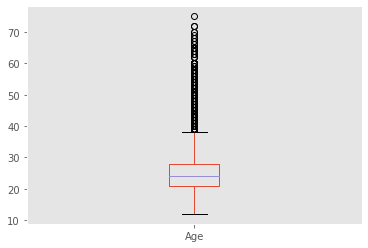

In [ ]:
plot_boxplot(df, "Age" )

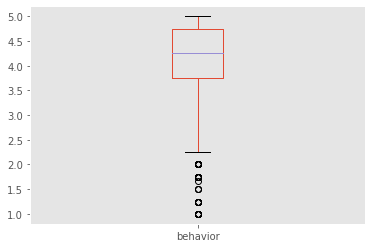

In [ ]:
plot_boxplot(df, "behavior" )

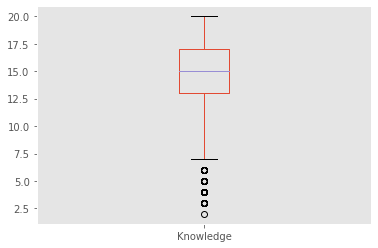

In [ ]:
plot_boxplot(df, "Knowledge" )

# Split

In [ ]:
df = onehot_df

Target Class Distribution:

In [ ]:
df.value_counts(['Suicide_related'])

Suicide_related
No                 6675
Yes                 467
dtype: int64

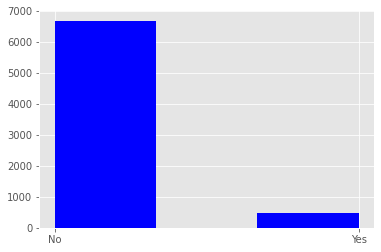

In [ ]:
plt.hist(df.Suicide_related, bins=3, density=False, alpha=1, color='b')
plt.show()

In [ ]:
yes_no_columns = ['Suicide_related']
for col in yes_no_columns:
    df[col].replace({'No':1, 'Yes':0},inplace=True)

In [ ]:
X = df.drop(['Suicide_related'],axis=1)
y = df['Suicide_related']

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10055    0
10058    1
10059    1
10061    1
10066    1
Name: Suicide_related, Length: 7142, dtype: int64

In [ ]:
X

,Age,behavior,Knowledge,Social_media_Frequency_2/3 days a week,Social_media_Frequency_Everday,Social_media_Frequency_More than 4 days a week,Social_media_Frequency_Several times a day,ISI_CATEGORY_Mild,ISI_CATEGORY_Moderate,ISI_CATEGORY_Severe,ISI_CATEGORY_Very Severe,Alcohol_Consumer_No,Alcohol_Consumer_Yes,COMORB_No,COMORB_Yes,Gender_Female,Gender_Male
0,29,3.000000,19,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,22,4.000000,16,0,0,0,1,1,0,0,0,1,0,0,1,0,1
2,30,4.250000,17,0,0,0,1,1,0,0,0,1,0,1,0,1,0
3,21,4.250000,18,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,24,4.500000,17,0,1,0,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10055,29,4.750000,14,0,1,0,0,1,0,0,0,1,0,1,0,0,1
10058,23,4.666667,11,0,1,0,0,1,0,0,0,1,0,1,0,0,1
10059,32,4.500000,14,0,1,0,0,0,1,0,0,1,0,1,0,1,0
10061,33,3.750000,16,0,0,0,1,0,0,1,0,1,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15,stratify=y)

In [ ]:
y_train.value_counts()

1    4672
0     327
Name: Suicide_related, dtype: int64

In [ ]:
y.value_counts()

1    6675
0     467
Name: Suicide_related, dtype: int64

In [ ]:
6675/467

14.29336188436831

In [ ]:
y_test.value_counts()

1    2003
0     140
Name: Suicide_related, dtype: int64

In [ ]:
2003/140

14.307142857142857

**As we can see from above the Ratio between two classes of our target is abnormally high. therefore we will have to handle this problem later.**

In [ ]:
X_train.shape

(4999, 17)

In [ ]:
X_test.shape

(2143, 17)

# Scaling The Dataset




In [ ]:
scaler = StandardScaler()
model = scaler.fit(X_train)
X_train = model.transform(X_train)
model = scaler.fit(X_test)
X_test = model.transform(X_test)

Printing Scaled Datasets

In [ ]:
X_train

array([[-0.38349155, -0.69923306,  0.17530565, ...,  1.68946119,
         1.14458461, -1.14458461],
       [-0.65559066, -2.76899701, -0.46436803, ..., -0.59190469,
         1.14458461, -1.14458461],
       [-0.38349155, -1.42973798,  0.49514249, ..., -0.59190469,
        -0.8736794 ,  0.8736794 ],
       ...,
       [-0.247442  , -1.42973798,  1.13481617, ..., -0.59190469,
        -0.8736794 ,  0.8736794 ],
       [-0.11139244,  0.76177679,  0.17530565, ..., -0.59190469,
        -0.8736794 ,  0.8736794 ],
       [-0.11139244,  0.76177679, -0.46436803, ...,  1.68946119,
        -0.8736794 ,  0.8736794 ]])

In [ ]:
X_test

array([[-0.26793717,  0.41878786,  0.8051596 , ..., -0.59621407,
        -0.85336147,  0.85336147],
       [ 0.26781217, -0.28639474, -1.07578919, ..., -0.59621407,
        -0.85336147,  0.85336147],
       [-0.66974917, -0.99157734, -0.44880626, ..., -0.59621407,
        -0.85336147,  0.85336147],
       ...,
       [ 0.66962417,  0.06619656,  0.49166813, ...,  1.67724991,
        -0.85336147,  0.85336147],
       [-0.66974917,  1.12397046,  0.49166813, ..., -0.59621407,
         1.17183636, -1.17183636],
       [-0.26793717,  1.12397046,  0.8051596 , ..., -0.59621407,
        -0.85336147,  0.85336147]])

In [ ]:
model.scale_

array([7.4661782 , 0.70903621, 3.18987951, 0.20582807, 0.49491007,
       0.19626561, 0.4998231 , 0.49956862, 0.4713495 , 0.3631612 ,
       0.17403192, 0.17528362, 0.17528362, 0.43985742, 0.43985742,
       0.49377892, 0.49377892])

# Training on Classifiers with Imbalanced Class Dataset

## Decision Tree

In [ ]:
dtree= DecisionTreeClassifier(criterion='entropy', random_state=1)  
dtree.fit(X_train, y_train)
y_pred= dtree.predict(X_test)

Score:

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", dtree.score(X_train, y_train)*100)
dtree_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.07      0.09      0.08       140
           1       0.93      0.91      0.92      2003

    accuracy                           0.86      2143
   macro avg       0.50      0.50      0.50      2143
weighted avg       0.88      0.86      0.87      2143

[[  13  127]
 [ 180 1823]]
Training Score:  98.91978395679136


## Logistic Regression

In [ ]:
logre=LogisticRegression()
logre.fit(X_train,y_train)
y_pred=logre.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", logre.score(X_train, y_train)*100)
logre_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.93      1.00      0.97      2003

    accuracy                           0.93      2143
   macro avg       0.47      0.50      0.48      2143
weighted avg       0.87      0.93      0.90      2143

[[   0  140]
 [   0 2003]]
Training Score:  93.45869173834767


## Random Forest

In [ ]:
RanFor = RandomForestClassifier(n_estimators = 100) 
RanFor.fit(X_train, y_train)
y_pred = RanFor.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", RanFor.score(X_train, y_train)*100)
RanFor_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.02      0.01      0.01       140
           1       0.93      0.98      0.96      2003

    accuracy                           0.92      2143
   macro avg       0.48      0.49      0.48      2143
weighted avg       0.87      0.92      0.89      2143

[[   1  139]
 [  43 1960]]
Training Score:  98.91978395679136


## K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", knn.score(X_train, y_train)*100)
knn_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.09      0.06      0.07       140
           1       0.94      0.96      0.95      2003

    accuracy                           0.90      2143
   macro avg       0.51      0.51      0.51      2143
weighted avg       0.88      0.90      0.89      2143

[[   8  132]
 [  83 1920]]
Training Score:  94.0388077615523


## Support Vector Machine

In [ ]:
svc = SVC(kernel='linear', random_state=1, probability=True)  
svc.fit(X_train, y_train)  
y_pred = svc.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", svc.score(X_train, y_train)*100)
svc_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.93      1.00      0.97      2003

    accuracy                           0.93      2143
   macro avg       0.47      0.50      0.48      2143
weighted avg       0.87      0.93      0.90      2143

[[   0  140]
 [   0 2003]]
Training Score:  93.45869173834767


## XG Boost

In [ ]:
xgb_skl = XGBClassifier()             
xgb_skl.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_skl.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", xgb_skl.score(X_train, y_train)*100)
xgb_skl_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.93      1.00      0.97      2003

    accuracy                           0.93      2143
   macro avg       0.47      0.50      0.48      2143
weighted avg       0.87      0.93      0.90      2143

[[   0  140]
 [   1 2002]]
Training Score:  93.498699739948


## Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(X_train,y_train)*100)
gnb_0 = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.19      0.30      0.23       140
           1       0.95      0.91      0.93      2003

    accuracy                           0.87      2143
   macro avg       0.57      0.60      0.58      2143
weighted avg       0.90      0.87      0.88      2143

[[  42   98]
 [ 184 1819]]
Training Score:  86.41728345669134


In [ ]:
y_score1 = dtree.predict_proba(X_test)[:,1]
y_score2 = logre.predict_proba(X_test)[:,1]
y_score3 = RanFor.predict_proba(X_test)[:,1]
y_score4 = knn.predict_proba(X_test)[:,1]
y_score5 = svc.predict_proba(X_test)[:,1]
y_score6 = xgb_skl.predict_proba(X_test)[:,1]
y_score7 = gnb.predict_proba(X_test)[:,1]


In [ ]:
r_probs = [0 for _ in range(len(y_test))]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
dtree_auc = roc_auc_score(y_test, y_score1)
logre_auc = roc_auc_score(y_test, y_score2)
RanFor_auc = roc_auc_score(y_test, y_score3)
knn_auc = roc_auc_score(y_test, y_score4)
svc_auc = roc_auc_score(y_test, y_score5)
xgb_skl_auc = roc_auc_score(y_test, y_score6)
gnb_auc = roc_auc_score(y_test, y_score7)

print('roc_auc_score for DecisionTree: ', dtree_auc)
print('roc_auc_score for Logistic Regression: ', logre_auc)
print('roc_auc_score for Random Forest: ', RanFor_auc)
print('roc_auc_score for KNN: ', knn_auc)
print('roc_auc_score for SVM: ', svc_auc)
print('roc_auc_score for XG Boost: ', xgb_skl_auc)
print('roc_auc_score for Naive Bayes: ', gnb_auc)

roc_auc_score for DecisionTree:  0.5014567434562442
roc_auc_score for Logistic Regression:  0.7226035946080879
roc_auc_score for Random Forest:  0.6338224805648669
roc_auc_score for KNN:  0.5725679338135654
roc_auc_score for SVM:  0.4533966906782683
roc_auc_score for XG Boost:  0.7043167391769489
roc_auc_score for Naive Bayes:  0.7135814135938949


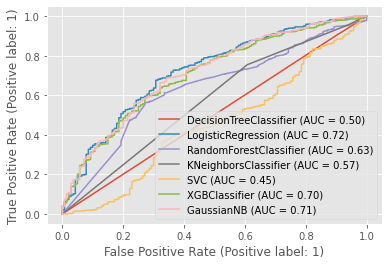

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

disp  = plot_roc_curve(dtree,X_test,y_test)
plot_roc_curve(logre,X_test,y_test, ax=disp.ax_)
plot_roc_curve(RanFor,X_test,y_test, ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test, ax=disp.ax_)
plot_roc_curve(xgb_skl,X_test,y_test, ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test, ax=disp.ax_)

# Handling Imbalance Class Problem

We have identified 3 approaches to handle our imbalance class problem.
They are:


1.   Resampling Techniques (Under Sampling, Over Sampling)
2.   Penalize Algorithms (Cost-Sensitive Training)
3.   Synthetic Minority Oversampling Technique (SMOTE)
4. Hybridization: SMOTE + ENN



## 1. Under Sampling (Using Near Miss)

In [ ]:
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The Number of classes before fit{}".format(Counter(y_train)))
print("The Number of classes After fit{}".format(Counter(y_train_ns)))

The Number of classes before fitCounter({1: 4672, 0: 327})
The Number of classes After fitCounter({0: 327, 1: 327})


### Decision Tree

In [ ]:
dtree= DecisionTreeClassifier(criterion='entropy', random_state=1)  
dtree.fit(X_train_ns, y_train_ns)
y_pred= dtree.predict(X_test)

Score:

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", dtree.score(X_train_ns, y_train_ns)*100)

              precision    recall  f1-score   support

           0       0.06      0.81      0.12       140
           1       0.93      0.17      0.28      2003

    accuracy                           0.21      2143
   macro avg       0.50      0.49      0.20      2143
weighted avg       0.87      0.21      0.27      2143

[[ 114   26]
 [1671  332]]
Training Score:  94.80122324159022


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(dtree, X_train_ns,y_train_ns, cv = 5, scoring='precision')
acc_scores = cross_val_score(dtree,X_train_ns,y_train_ns, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(dtree, X_train_ns,y_train_ns, cv = 5, scoring='recall')
f1_scores = cross_val_score(dtree, X_train_ns,y_train_ns, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
dtree_1 = acc_scores.mean() 

Average cross-validation Precision: 0.6736642891555059
Average cross-validation Recall: 0.6263869463869465
Average cross-validation F1: 0.6473646672146571
Average cross-validation Accuracy: 0.6636523781561949


### Logistic Regression

In [ ]:
logre=LogisticRegression()
logre.fit(X_train_ns,y_train_ns)
y_pred=logre.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", logre.score(X_train_ns,y_train_ns)*100)

              precision    recall  f1-score   support

           0       0.06      0.74      0.12       140
           1       0.93      0.24      0.38      2003

    accuracy                           0.27      2143
   macro avg       0.50      0.49      0.25      2143
weighted avg       0.87      0.27      0.37      2143

[[ 104   36]
 [1520  483]]
Training Score:  79.51070336391437


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(logre, X_train_ns,y_train_ns, cv = 5, scoring='precision')
acc_scores = cross_val_score(logre,X_train_ns,y_train_ns, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(logre, X_train_ns,y_train_ns, cv = 5, scoring='recall')
f1_scores = cross_val_score(logre, X_train_ns,y_train_ns, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
logre_1 = acc_scores.mean()

Average cross-validation Precision: 0.7422067782635773
Average cross-validation Recall: 0.8958508158508159
Average cross-validation F1: 0.8076753618752989
Average cross-validation Accuracy: 0.7874691720493247


### Random Forest

In [ ]:
RanFor = RandomForestClassifier(n_estimators = 100) 
RanFor.fit(X_train_ns,y_train_ns)
y_pred = RanFor.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", RanFor.score(X_train_ns,y_train_ns)*100)

              precision    recall  f1-score   support

           0       0.06      0.79      0.12       140
           1       0.92      0.18      0.30      2003

    accuracy                           0.22      2143
   macro avg       0.49      0.48      0.21      2143
weighted avg       0.87      0.22      0.28      2143

[[ 111   29]
 [1649  354]]
Training Score:  94.80122324159022


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(RanFor, X_train_ns,y_train_ns, cv = 5, scoring='precision')
acc_scores = cross_val_score(RanFor,X_train_ns,y_train_ns, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(RanFor, X_train_ns,y_train_ns, cv = 5, scoring='recall')
f1_scores = cross_val_score(RanFor, X_train_ns,y_train_ns, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
RanFor_1 = acc_scores.mean()

Average cross-validation Precision: 0.7135726374411979
Average cross-validation Recall: 0.7394871794871796
Average cross-validation F1: 0.7252692164167144
Average cross-validation Accuracy: 0.7202348796241925


### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train_ns,y_train_ns)
y_pred = knn.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", knn.score(X_train_ns,y_train_ns)*100)

              precision    recall  f1-score   support

           0       0.07      0.80      0.13       140
           1       0.95      0.25      0.39      2003

    accuracy                           0.29      2143
   macro avg       0.51      0.52      0.26      2143
weighted avg       0.89      0.29      0.38      2143

[[ 112   28]
 [1504  499]]
Training Score:  82.11009174311926


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(knn, X_train_ns,y_train_ns, cv = 5, scoring='precision')
acc_scores = cross_val_score(knn,X_train_ns,y_train_ns, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(knn, X_train_ns,y_train_ns, cv = 5, scoring='recall')
f1_scores = cross_val_score(knn, X_train_ns,y_train_ns, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
knn_1 = acc_scores.mean()

Average cross-validation Precision: 0.685135753892281
Average cross-validation Recall: 0.7151515151515152
Average cross-validation F1: 0.6961557108944825
Average cross-validation Accuracy: 0.6881620669406929


### XG Boost

In [ ]:
xgb_skl = XGBClassifier(objective ='binary:logistic')             
xgb_skl.fit(X_train_ns,y_train_ns)

XGBClassifier()

In [ ]:
y_pred = xgb_skl.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", xgb_skl.score(X_train_ns,y_train_ns)*100)

              precision    recall  f1-score   support

           0       0.06      0.76      0.12       140
           1       0.92      0.20      0.33      2003

    accuracy                           0.24      2143
   macro avg       0.49      0.48      0.22      2143
weighted avg       0.87      0.24      0.32      2143

[[ 107   33]
 [1601  402]]
Training Score:  84.40366972477065


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(xgb_skl, X_train_ns,y_train_ns, cv = 5, scoring='precision')
acc_scores = cross_val_score(xgb_skl,X_train_ns,y_train_ns, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(xgb_skl, X_train_ns,y_train_ns, cv = 5, scoring='recall')
f1_scores = cross_val_score(xgb_skl, X_train_ns,y_train_ns, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
xgb_skl_1 = acc_scores.mean()

Average cross-validation Precision: 0.7422314822147603
Average cross-validation Recall: 0.841025641025641
Average cross-validation F1: 0.7852593353888319
Average cross-validation Accuracy: 0.7706400469759249


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_ns,y_train_ns).predict(X_test)

Score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(X_train_ns,y_train_ns)*100)

              precision    recall  f1-score   support

           0       0.07      1.00      0.12       140
           1       0.00      0.00      0.00      2003

    accuracy                           0.07      2143
   macro avg       0.03      0.50      0.06      2143
weighted avg       0.00      0.07      0.01      2143

[[ 140    0]
 [2003    0]]
Training Score:  67.43119266055045


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(gnb, X_train_ns,y_train_ns, cv = 5, scoring='precision')
acc_scores = cross_val_score(gnb,X_train_ns,y_train_ns, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(gnb, X_train_ns,y_train_ns, cv = 5, scoring='recall')
f1_scores = cross_val_score(gnb, X_train_ns,y_train_ns, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
gnb_1 = acc_scores.mean()

Average cross-validation Precision: 0.593316742556269
Average cross-validation Recall: 0.9786013986013986
Average cross-validation F1: 0.7371023435018703
Average cross-validation Accuracy: 0.6482912507339988


In [ ]:
y_score1 = dtree.predict_proba(X_test)[:,1]
y_score2 = logre.predict_proba(X_test)[:,1]
y_score3 = RanFor.predict_proba(X_test)[:,1]
y_score4 = knn.predict_proba(X_test)[:,1]
y_score5 = svc.predict_proba(X_test)[:,1]
y_score6 = xgb_skl.predict_proba(X_test)[:,1]
y_score7 = gnb.predict_proba(X_test)[:,1]


In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
dtree_auc = roc_auc_score(y_test, y_score1)
logre_auc = roc_auc_score(y_test, y_score2)
RanFor_auc = roc_auc_score(y_test, y_score3)
knn_auc = roc_auc_score(y_test, y_score4)
svc_auc = roc_auc_score(y_test, y_score5)
xgb_skl_auc = roc_auc_score(y_test, y_score6)
gnb_auc = roc_auc_score(y_test, y_score7)

print('roc_auc_score for DecisionTree: ', dtree_auc)
print('roc_auc_score for Logistic Regression: ', logre_auc)
print('roc_auc_score for Random Forest: ', RanFor_auc)
print('roc_auc_score for KNN: ', knn_auc)
print('roc_auc_score for SVM: ', svc_auc)
print('roc_auc_score for XG Boost: ', xgb_skl_auc)
print('roc_auc_score for Naive Bayes: ', gnb_auc)

roc_auc_score for DecisionTree:  0.49354361315170103
roc_auc_score for Logistic Regression:  0.5212484844162328
roc_auc_score for Random Forest:  0.5010609086370444
roc_auc_score for KNN:  0.5030026388987947
roc_auc_score for SVM:  0.4533966906782683
roc_auc_score for XG Boost:  0.48770594108836746
roc_auc_score for Naive Bayes:  0.5


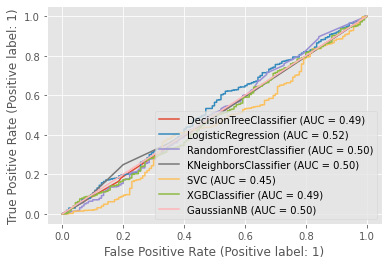

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

disp  = plot_roc_curve(dtree,X_test,y_test)
plot_roc_curve(logre,X_test,y_test, ax=disp.ax_)
plot_roc_curve(RanFor,X_test,y_test, ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test, ax=disp.ax_)
plot_roc_curve(xgb_skl,X_test,y_test, ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test, ax=disp.ax_)

## 2. Over Sampling

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
#X_train_os = pd.DataFrame(X_train_os)
#y_train_os = pd.DataFrame(y_train_os)
print("The Number of classes before fit{}".format(Counter(y_train)))
print("The Number of classes After fit{}".format(Counter(y_train_os)))

The Number of classes before fitCounter({1: 4672, 0: 327})
The Number of classes After fitCounter({1: 4672, 0: 4672})


### Decision Tree

In [ ]:
dtree= DecisionTreeClassifier(criterion='entropy', random_state=1)  
dtree.fit(X_train_os, y_train_os)
y_pred= dtree.predict(X_test)

Score:

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", dtree.score(X_train_os, y_train_os)*100)

              precision    recall  f1-score   support

           0       0.06      0.07      0.06       140
           1       0.93      0.92      0.93      2003

    accuracy                           0.86      2143
   macro avg       0.50      0.49      0.49      2143
weighted avg       0.88      0.86      0.87      2143

[[  10  130]
 [ 164 1839]]
Training Score:  99.4220890410959


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(dtree, X_train_os, y_train_os, cv = 5, scoring='precision')
acc_scores = cross_val_score(dtree,X_train_os, y_train_os, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(dtree, X_train_os, y_train_os, cv = 5, scoring='recall')
f1_scores = cross_val_score(dtree, X_train_os, y_train_os, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
dtree_2 = acc_scores.mean() 

Average cross-validation Precision: 1.0
Average cross-validation Recall: 0.9047496249813923
Average cross-validation F1: 0.9499605169784214
Average cross-validation Accuracy: 0.952375624840317


### Logistic Regression

In [ ]:
logre=LogisticRegression()
logre.fit(X_train_os, y_train_os)
y_pred=logre.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", logre.score(X_train_os, y_train_os)*100)

              precision    recall  f1-score   support

           0       0.12      0.69      0.21       140
           1       0.97      0.66      0.79      2003

    accuracy                           0.66      2143
   macro avg       0.55      0.67      0.50      2143
weighted avg       0.91      0.66      0.75      2143

[[  96   44]
 [ 674 1329]]
Training Score:  66.6095890410959


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(logre, X_train_os, y_train_os, cv = 5, scoring='precision')
acc_scores = cross_val_score(logre,X_train_os, y_train_os, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(logre, X_train_os, y_train_os, cv = 5, scoring='recall')
f1_scores = cross_val_score(logre, X_train_os, y_train_os, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
logre_2 = acc_scores.mean()

Average cross-validation Precision: 0.6606971844194364
Average cross-validation Recall: 0.6688763182906022
Average cross-validation F1: 0.6647108559245672
Average cross-validation Accuracy: 0.6626703237655287


### Random Forest

In [ ]:
RanFor = RandomForestClassifier(n_estimators = 100) 
RanFor.fit(X_train_os, y_train_os)
y_pred = RanFor.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels=(1,0)))
print("Training Score: ", RanFor.score(X_train_os, y_train_os)*100)

              precision    recall  f1-score   support

           0       0.04      0.03      0.03       140
           1       0.93      0.95      0.94      2003

    accuracy                           0.89      2143
   macro avg       0.49      0.49      0.49      2143
weighted avg       0.87      0.89      0.88      2143

[[1905   98]
 [ 136    4]]
Training Score:  99.4220890410959


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(RanFor, X_train_os, y_train_os, cv = 5, scoring='precision')
acc_scores = cross_val_score(RanFor,X_train_os, y_train_os, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(RanFor, X_train_os, y_train_os, cv = 5, scoring='recall')
f1_scores = cross_val_score(RanFor, X_train_os, y_train_os, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
RanFor_2 = acc_scores.mean()

Average cross-validation Precision: 1.0
Average cross-validation Recall: 0.9411386824537095
Average cross-validation F1: 0.9687544771416816
Average cross-validation Accuracy: 0.9699272933916729


### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train_os, y_train_os)
y_pred = knn.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", knn.score(X_train_os, y_train_os)*100)

              precision    recall  f1-score   support

           0       0.11      0.24      0.15       140
           1       0.94      0.86      0.90      2003

    accuracy                           0.82      2143
   macro avg       0.52      0.55      0.52      2143
weighted avg       0.89      0.82      0.85      2143

[[  33  107]
 [ 278 1725]]
Training Score:  96.50042808219177


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(knn, X_train_os, y_train_os, cv = 5, scoring='precision')
acc_scores = cross_val_score(knn,X_train_os, y_train_os, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(knn, X_train_os, y_train_os, cv = 5, scoring='recall')
f1_scores = cross_val_score(knn, X_train_os, y_train_os, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
knn_2 = acc_scores.mean()

Average cross-validation Precision: 1.0
Average cross-validation Recall: 0.8469537038097309
Average cross-validation F1: 0.9170555224391096
Average cross-validation Accuracy: 0.9234796172878121


### XG Boost

In [ ]:
train_d_matrix = xgb.DMatrix(X_train_os, label = y_train_os)
test_d_matrix = xgb.DMatrix(X_test, label = y_test)

xgb_skl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)
#xgb_skl = XGBClassifier(objective ='binary:logistic')             

xgb_skl.fit(X_train_os, y_train_os)

XGBClassifier(gpu_id=0, interaction_constraints='', learning_rate=0.300000012,
              max_depth=6, n_jobs=4, num_parallel_tree=1, tree_method='exact',
              validate_parameters=1)

In [ ]:
y_pred = xgb_skl.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", xgb_skl.score(X_train_os, y_train_os)*100)

              precision    recall  f1-score   support

           0       0.09      0.19      0.13       140
           1       0.94      0.87      0.90      2003

    accuracy                           0.83      2143
   macro avg       0.52      0.53      0.51      2143
weighted avg       0.88      0.83      0.85      2143

[[  27  113]
 [ 261 1742]]
Training Score:  95.28039383561644


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(xgb_skl, X_train_os, y_train_os, cv = 5, scoring='precision')
acc_scores = cross_val_score(xgb_skl,X_train_os, y_train_os, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(xgb_skl, X_train_os, y_train_os, cv = 5, scoring='recall')
f1_scores = cross_val_score(xgb_skl, X_train_os, y_train_os, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
xgb_skl_2 = acc_scores.mean()

Average cross-validation Precision: 0.9870058646996369
Average cross-validation Recall: 0.8576617160393454
Average cross-validation F1: 0.9177685448161792
Average cross-validation Accuracy: 0.9231591055689412


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_os, y_train_os).predict(X_test)

Score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(X_train_os, y_train_os)*100)

              precision    recall  f1-score   support

           0       0.12      0.68      0.21       140
           1       0.97      0.66      0.79      2003

    accuracy                           0.66      2143
   macro avg       0.55      0.67      0.50      2143
weighted avg       0.91      0.66      0.75      2143

[[  95   45]
 [ 678 1325]]
Training Score:  66.62029109589042


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(gnb, X_train_os, y_train_os, cv = 5, scoring='precision')
acc_scores = cross_val_score(gnb,X_train_os, y_train_os, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(gnb, X_train_os, y_train_os, cv = 5, scoring='recall')
f1_scores = cross_val_score(gnb, X_train_os, y_train_os, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
gnb_2 = acc_scores.mean()

Average cross-validation Precision: 0.6588358154973882
Average cross-validation Recall: 0.6628826621168227
Average cross-validation F1: 0.6607270377874442
Average cross-validation Accuracy: 0.6596737826569649


In [ ]:
y_score1 = dtree.predict_proba(X_test)[:,1]
y_score2 = logre.predict_proba(X_test)[:,1]
y_score3 = RanFor.predict_proba(X_test)[:,1]
y_score4 = knn.predict_proba(X_test)[:,1]
y_score5 = svc.predict_proba(X_test)[:,1]
y_score6 = xgb_skl.predict_proba(X_test)[:,1]
y_score7 = gnb.predict_proba(X_test)[:,1]


In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
dtree_auc = roc_auc_score(y_test, y_score1)
logre_auc = roc_auc_score(y_test, y_score2)
RanFor_auc = roc_auc_score(y_test, y_score3)
knn_auc = roc_auc_score(y_test, y_score4)
svc_auc = roc_auc_score(y_test, y_score5)
xgb_skl_auc = roc_auc_score(y_test, y_score6)
gnb_auc = roc_auc_score(y_test, y_score7)

print('roc_auc_score for DecisionTree: ', dtree_auc)
print('roc_auc_score for Logistic Regression: ', logre_auc)
print('roc_auc_score for Random Forest: ', RanFor_auc)
print('roc_auc_score for KNN: ', knn_auc)
print('roc_auc_score for SVM: ', svc_auc)
print('roc_auc_score for XG Boost: ', xgb_skl_auc)
print('roc_auc_score for Naive Bayes: ', gnb_auc)

roc_auc_score for DecisionTree:  0.49489872334355606
roc_auc_score for Logistic Regression:  0.7230957135724985
roc_auc_score for Random Forest:  0.620565580201127
roc_auc_score for KNN:  0.5470704657299764
roc_auc_score for SVM:  0.4533966906782683
roc_auc_score for XG Boost:  0.6193727266243492
roc_auc_score for Naive Bayes:  0.7159314599529277


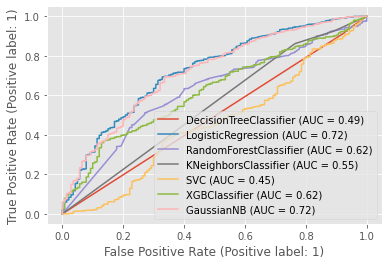

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

disp  = plot_roc_curve(dtree,X_test,y_test)
plot_roc_curve(logre,X_test,y_test, ax=disp.ax_)
plot_roc_curve(RanFor,X_test,y_test, ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test, ax=disp.ax_)
plot_roc_curve(xgb_skl,X_test,y_test, ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test, ax=disp.ax_)

## 3. Penalize Algorithms (Cost-Sensitive Training)

### Support Vector Machine

In [ ]:
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", svc.score(X_train, y_train)*100)

              precision    recall  f1-score   support

           0       0.12      0.58      0.19       140
           1       0.96      0.69      0.80      2003

    accuracy                           0.68      2143
   macro avg       0.54      0.64      0.50      2143
weighted avg       0.90      0.68      0.76      2143

[[  81   59]
 [ 617 1386]]
Training Score:  71.5743148629726


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(svc, X_train, y_train, cv = 5, scoring='precision')
acc_scores = cross_val_score(svc,X_train, y_train, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(svc, X_train, y_train, cv = 5, scoring='recall')
f1_scores = cross_val_score(svc, X_train, y_train, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))


Average cross-validation Precision: 0.9594725666225801
Average cross-validation Recall: 0.69092191597293
Average cross-validation F1: 0.8029774262544477
Average cross-validation Accuracy: 0.6839265265265266


## 3. Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_sm.value_counts()

1    4672
0    4672
Name: Suicide_related, dtype: int64

In [ ]:
y_test.value_counts()

1    2003
0     140
Name: Suicide_related, dtype: int64

### Decision Tree

In [ ]:
dtree= DecisionTreeClassifier(criterion='entropy', random_state=1)  
dtree.fit(X_train_sm, y_train_sm)
y_pred= dtree.predict(X_test)

Score:

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", dtree.score(X_train_sm, y_train_sm)*100)

              precision    recall  f1-score   support

           0       0.08      0.83      0.14       140
           1       0.96      0.29      0.45      2003

    accuracy                           0.33      2143
   macro avg       0.52      0.56      0.29      2143
weighted avg       0.90      0.33      0.43      2143

[[ 116   24]
 [1421  582]]
Training Score:  99.4220890410959


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(dtree, X_train_sm, y_train_sm, cv = 5, scoring='precision')
acc_scores = cross_val_score(dtree,X_train_sm, y_train_sm, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(dtree, X_train_sm, y_train_sm, cv = 5, scoring='recall')
f1_scores = cross_val_score(dtree, X_train_sm, y_train_sm, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
dtree_3 = acc_scores.mean() 

Average cross-validation Precision: 0.9184334425254349
Average cross-validation Recall: 0.8983167103711253
Average cross-validation F1: 0.9047413261049687
Average cross-validation Accuracy: 0.9032552991843706


### Logistic Regression

In [ ]:
logre=LogisticRegression()
logre.fit(X_train_sm, y_train_sm)
y_pred=logre.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", logre.score(X_train_sm, y_train_sm)*100)

              precision    recall  f1-score   support

           0       0.12      0.67      0.20       140
           1       0.97      0.66      0.78      2003

    accuracy                           0.66      2143
   macro avg       0.54      0.66      0.49      2143
weighted avg       0.91      0.66      0.74      2143

[[  94   46]
 [ 686 1317]]
Training Score:  65.74272260273972


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(logre, X_train_sm, y_train_sm, cv = 5, scoring='precision')
logre_3 = acc_scores = cross_val_score(logre,X_train_sm, y_train_sm, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(logre, X_train_sm, y_train_sm, cv = 5, scoring='recall')
f1_scores = cross_val_score(logre, X_train_sm, y_train_sm, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
logre_3 = acc_scores.mean()

Average cross-validation Precision: 0.6553398543365156
Average cross-validation Recall: 0.6611730353032783
Average cross-validation F1: 0.6581066007565575
Average cross-validation Accuracy: 0.6565706907356933


### Random Forest

In [ ]:
RanFor = RandomForestClassifier(n_estimators = 100) 
RanFor.fit(X_train_sm, y_train_sm)
y_pred = RanFor.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", RanFor.score(X_train_sm, y_train_sm)*100)

              precision    recall  f1-score   support

           0       0.07      0.89      0.13       140
           1       0.96      0.17      0.29      2003

    accuracy                           0.22      2143
   macro avg       0.51      0.53      0.21      2143
weighted avg       0.90      0.22      0.28      2143

[[ 124   16]
 [1663  340]]
Training Score:  99.4220890410959


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(RanFor, X_train_sm, y_train_sm, cv = 5, scoring='precision')
acc_scores = cross_val_score(RanFor,X_train_sm, y_train_sm, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(RanFor, X_train_sm, y_train_sm, cv = 5, scoring='recall')
f1_scores = cross_val_score(RanFor, X_train_sm, y_train_sm, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
RanFor_3 = acc_scores.mean()

Average cross-validation Precision: 0.9404261395646385
Average cross-validation Recall: 0.9336415165637989
Average cross-validation F1: 0.9337490187325935
Average cross-validation Accuracy: 0.9322574565519011


### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", knn.score(X_train_sm, y_train_sm)*100)

              precision    recall  f1-score   support

           0       0.08      0.44      0.14       140
           1       0.94      0.66      0.78      2003

    accuracy                           0.65      2143
   macro avg       0.51      0.55      0.46      2143
weighted avg       0.89      0.65      0.74      2143

[[  62   78]
 [ 673 1330]]
Training Score:  87.6070205479452


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(knn, X_train_sm, y_train_sm, cv = 5, scoring='precision')
acc_scores = cross_val_score(knn,X_train_sm, y_train_sm, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(knn, X_train_sm, y_train_sm, cv = 5, scoring='recall')
f1_scores = cross_val_score(knn, X_train_sm, y_train_sm, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
knn_3 = acc_scores.mean()

Average cross-validation Precision: 0.9586607286750226
Average cross-validation Recall: 0.6639487455484432
Average cross-validation F1: 0.784402219877458
Average cross-validation Accuracy: 0.8176365082038396


### XG Boost

In [ ]:
train_d_matrix = xgb.DMatrix(X_train_sm, label = y_train_sm)
test_d_matrix = xgb.DMatrix(X_test, label = y_test)

xgb_skl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)
#xgb_skl = XGBClassifier(objective ='binary:logistic')             

xgb_skl.fit(X_train_sm, y_train_sm)

XGBClassifier(gpu_id=0, interaction_constraints='', learning_rate=0.300000012,
              max_depth=6, n_jobs=4, num_parallel_tree=1, tree_method='exact',
              validate_parameters=1)

In [ ]:
y_pred = xgb_skl.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", xgb_skl.score(X_train_sm, y_train_sm)*100)

              precision    recall  f1-score   support

           0       0.07      0.99      0.12       140
           1       0.97      0.02      0.04      2003

    accuracy                           0.08      2143
   macro avg       0.52      0.51      0.08      2143
weighted avg       0.92      0.08      0.04      2143

[[ 139    1]
 [1965   38]]
Training Score:  97.57063356164383


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(xgb_skl, X_train_sm, y_train_sm, cv = 5, scoring='precision')
acc_scores = cross_val_score(xgb_skl,X_train_sm, y_train_sm, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(xgb_skl, X_train_sm, y_train_sm, cv = 5, scoring='recall')
f1_scores = cross_val_score(xgb_skl, X_train_sm, y_train_sm, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
xgb_skl_3 = acc_scores.mean()

Average cross-validation Precision: 0.9462953129033448
Average cross-validation Recall: 0.9843724306931259
Average cross-validation F1: 0.961461258721332
Average cross-validation Accuracy: 0.9563390859315118


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_sm, y_train_sm).predict(X_test)

Score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(X_train_sm, y_train_sm)*100)

              precision    recall  f1-score   support

           0       0.11      0.67      0.18       140
           1       0.96      0.60      0.74      2003

    accuracy                           0.61      2143
   macro avg       0.53      0.64      0.46      2143
weighted avg       0.91      0.61      0.71      2143

[[  94   46]
 [ 793 1210]]
Training Score:  67.20890410958904


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(gnb, X_train_sm, y_train_sm, cv = 5, scoring='precision')
acc_scores = cross_val_score(gnb,X_train_sm, y_train_sm, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(gnb, X_train_sm, y_train_sm, cv = 5, scoring='recall')
f1_scores = cross_val_score(gnb, X_train_sm, y_train_sm, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
gnb_3 = acc_scores.mean()

Average cross-validation Precision: 0.6944105001147749
Average cross-validation Recall: 0.6172948276059499
Average cross-validation F1: 0.6535634092256674
Average cross-validation Accuracy: 0.6728372762862573


In [ ]:
y_score1 = dtree.predict_proba(X_test)[:,1]
y_score2 = logre.predict_proba(X_test)[:,1]
y_score3 = RanFor.predict_proba(X_test)[:,1]
y_score4 = knn.predict_proba(X_test)[:,1]
y_score5 = svc.predict_proba(X_test)[:,1]
y_score6 = xgb_skl.predict_proba(X_test)[:,1]
y_score7 = gnb.predict_proba(X_test)[:,1]


In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
dtree_auc = roc_auc_score(y_test, y_score1)
logre_auc = roc_auc_score(y_test, y_score2)
RanFor_auc = roc_auc_score(y_test, y_score3)
knn_auc = roc_auc_score(y_test, y_score4)
svc_auc = roc_auc_score(y_test, y_score5)
xgb_skl_auc = roc_auc_score(y_test, y_score6)
gnb_auc = roc_auc_score(y_test, y_score7)

print('roc_auc_score for DecisionTree: ', dtree_auc)
print('roc_auc_score for Logistic Regression: ', logre_auc)
print('roc_auc_score for Random Forest: ', RanFor_auc)
print('roc_auc_score for KNN: ', knn_auc)
print('roc_auc_score for SVM: ', svc_auc)
print('roc_auc_score for XG Boost: ', xgb_skl_auc)
print('roc_auc_score for Naive Bayes: ', gnb_auc)

roc_auc_score for DecisionTree:  0.5603951216033093
roc_auc_score for Logistic Regression:  0.7215872619641965
roc_auc_score for Random Forest:  0.5864613793595321
roc_auc_score for KNN:  0.5670512089009343
roc_auc_score for SVM:  0.6753066828328935
roc_auc_score for XG Boost:  0.5934901219599173
roc_auc_score for Naive Bayes:  0.6982864988231938


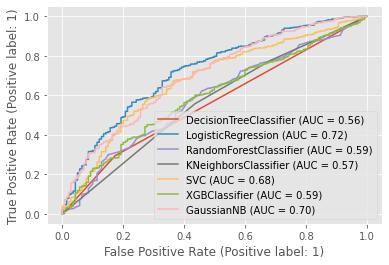

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

disp  = plot_roc_curve(dtree,X_test,y_test)
plot_roc_curve(logre,X_test,y_test, ax=disp.ax_)
plot_roc_curve(RanFor,X_test,y_test, ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test, ax=disp.ax_)
plot_roc_curve(xgb_skl,X_test,y_test, ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test, ax=disp.ax_)

## 4. Hybridization: SMOTE + ENN

SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. 

In [ ]:
smote_enn = SMOTEENN()
X_train_smenn, y_train_smenn = smote_enn.fit_resample(X_train, y_train)

In [ ]:
y_train_smenn.value_counts()

0    3631
1    2942
Name: Suicide_related, dtype: int64

In [ ]:
y_test.value_counts()

1    2003
0     140
Name: Suicide_related, dtype: int64

### Decision Tree

In [ ]:
dtree= DecisionTreeClassifier(criterion='entropy', random_state=1)  
dtree.fit(X_train_smenn, y_train_smenn)
y_pred= dtree.predict(X_test)

Score:

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", dtree.score(X_train_smenn, y_train_smenn)*100)
dtreescore = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.09      0.78      0.16       140
           1       0.96      0.42      0.59      2003

    accuracy                           0.45      2143
   macro avg       0.53      0.60      0.37      2143
weighted avg       0.91      0.45      0.56      2143

[[ 109   31]
 [1155  848]]
Training Score:  100.0


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(dtree, X_train_smenn, y_train_smenn, cv = 5, scoring='precision')
acc_scores = cross_val_score(dtree,X_train_smenn, y_train_smenn, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(dtree, X_train_smenn, y_train_smenn, cv = 5, scoring='recall')
f1_scores = cross_val_score(dtree, X_train_smenn, y_train_smenn, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
dtree_4 = acc_scores.mean() 

Average cross-validation Precision: 0.9342309975900086
Average cross-validation Recall: 0.9255685296189784
Average cross-validation F1: 0.9283861847614243
Average cross-validation Accuracy: 0.9351931524211331


### Logistic Regression

In [ ]:
logre=LogisticRegression()
logre.fit(X_train_smenn, y_train_smenn)
y_pred=logre.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", logre.score(X_train_smenn, y_train_smenn)*100)
lrscore =  accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.11      0.74      0.19       140
           1       0.97      0.59      0.73      2003

    accuracy                           0.60      2143
   macro avg       0.54      0.67      0.46      2143
weighted avg       0.91      0.60      0.70      2143

[[ 104   36]
 [ 825 1178]]
Training Score:  75.17115472387039


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(logre, X_train_smenn, y_train_smenn, cv = 5, scoring='precision')
acc_scores = cross_val_score(logre,X_train_smenn, y_train_smenn, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(logre, X_train_smenn, y_train_smenn, cv = 5, scoring='recall')
f1_scores = cross_val_score(logre, X_train_smenn, y_train_smenn, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
logre_4 = acc_scores.mean()

Average cross-validation Precision: 0.7272678512878245
Average cross-validation Recall: 0.7052983842093713
Average cross-validation F1: 0.715927758720917
Average cross-validation Accuracy: 0.7495796656075837


### Random Forest

In [ ]:
RanFor = RandomForestClassifier(n_estimators = 100) 
RanFor.fit(X_train_smenn, y_train_smenn)
y_pred = RanFor.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", RanFor.score(X_train_smenn, y_train_smenn)*100)
rfscore = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.08      0.78      0.15       140
           1       0.96      0.38      0.55      2003

    accuracy                           0.41      2143
   macro avg       0.52      0.58      0.35      2143
weighted avg       0.90      0.41      0.52      2143

[[ 109   31]
 [1239  764]]
Training Score:  100.0


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(RanFor, X_train_smenn, y_train_smenn, cv = 5, scoring='precision')
acc_scores = cross_val_score(RanFor,X_train_smenn, y_train_smenn, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(RanFor,X_train_smenn, y_train_smenn, cv = 5, scoring='recall')
f1_scores = cross_val_score(RanFor, X_train_smenn, y_train_smenn, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
RanFor_4 = acc_scores.mean()

Average cross-validation Precision: 0.9763137451931104
Average cross-validation Recall: 0.9670356767494775
Average cross-validation F1: 0.9704265764866591
Average cross-validation Accuracy: 0.9729224323026082


### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train_smenn, y_train_smenn)
y_pred = knn.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", knn.score(X_train_smenn, y_train_smenn)*100)
knnscore = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.10      0.62      0.17       140
           1       0.96      0.61      0.75      2003

    accuracy                           0.61      2143
   macro avg       0.53      0.62      0.46      2143
weighted avg       0.90      0.61      0.71      2143

[[  87   53]
 [ 780 1223]]
Training Score:  98.31127339114559


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(knn, X_train_smenn, y_train_smenn, cv = 5, scoring='precision')
acc_scores = cross_val_score(knn,X_train_smenn, y_train_smenn, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(knn,X_train_smenn, y_train_smenn, cv = 5, scoring='recall')
f1_scores = cross_val_score(knn, X_train_smenn, y_train_smenn, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
knn_4 = acc_scores.mean()

Average cross-validation Precision: 0.9957957391594823
Average cross-validation Recall: 0.8817158102629847
Average cross-validation F1: 0.9351763725144868
Average cross-validation Accuracy: 0.9453830349960356


### XG Boost

In [ ]:
train_d_matrix = xgb.DMatrix(X_train_sm, label = y_train_sm)
test_d_matrix = xgb.DMatrix(X_test, label = y_test)

xgb_skl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)
#xgb_skl = XGBClassifier(objective ='binary:logistic')             

xgb_skl.fit(X_train_smenn, y_train_smenn)

XGBClassifier(gpu_id=0, interaction_constraints='', learning_rate=0.300000012,
              max_depth=6, n_jobs=4, num_parallel_tree=1, tree_method='exact',
              validate_parameters=1)

In [ ]:
y_pred = xgb_skl.predict(X_test)

Score

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", xgb_skl.score(X_train_smenn, y_train_smenn)*100)
xgscore = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.07      0.97      0.13       140
           1       0.97      0.07      0.13      2003

    accuracy                           0.13      2143
   macro avg       0.52      0.52      0.13      2143
weighted avg       0.91      0.13      0.13      2143

[[ 136    4]
 [1859  144]]
Training Score:  99.31538110451848


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(xgb_skl, X_train_smenn, y_train_smenn, cv = 5, scoring='precision')
acc_scores = cross_val_score(xgb_skl,X_train_smenn, y_train_smenn, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(xgb_skl,X_train_smenn, y_train_smenn, cv = 5, scoring='recall')
f1_scores = cross_val_score(xgb_skl, X_train_smenn, y_train_smenn, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
xgb_skl_4 = acc_scores.mean()

Average cross-validation Precision: 0.940040986866346
Average cross-validation Recall: 0.9728168347135119
Average cross-validation F1: 0.951244337423357
Average cross-validation Accuracy: 0.9502623400524334


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_smenn, y_train_smenn).predict(X_test)

Score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gnb.score(X_train_smenn, y_train_smenn)*100)
gnscore = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.11      0.69      0.19       140
           1       0.96      0.60      0.74      2003

    accuracy                           0.61      2143
   macro avg       0.54      0.64      0.46      2143
weighted avg       0.91      0.61      0.70      2143

[[  96   44]
 [ 801 1202]]
Training Score:  75.35371976266545


Applying K-Fold Cross Validation, K=5

In [ ]:
precision_scores = cross_val_score(gnb, X_train_smenn, y_train_smenn, cv = 5, scoring='precision')
acc_scores = cross_val_score(gnb,X_train_smenn, y_train_smenn, cv = 5, scoring='accuracy')
recall_scores = cross_val_score(gnb,X_train_smenn, y_train_smenn, cv = 5, scoring='recall')
f1_scores = cross_val_score(gnb, X_train_smenn, y_train_smenn, cv = 5, scoring='f1')
#print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation Precision: {}'.format(precision_scores.mean()))
print('Average cross-validation Recall: {}'.format(recall_scores.mean()))
print('Average cross-validation F1: {}'.format(f1_scores.mean()))
print('Average cross-validation Accuracy: {}'.format(acc_scores.mean()))
gnb_4 = acc_scores.mean()

Average cross-validation Precision: 0.7257858728379706
Average cross-validation Recall: 0.7212749615975423
Average cross-validation F1: 0.7234632145375844
Average cross-validation Accuracy: 0.7532317076699597


In [ ]:
names = ["Decision Tree","Logistic Regression", "Random Forest", "KNN","XG Boost", "Naive Bayes"]
results = [dtreescore,lrscore,rfscore,knnscore,xgscore,gnscore]

Precision graph for every Classifier

<BarContainer object of 6 artists>

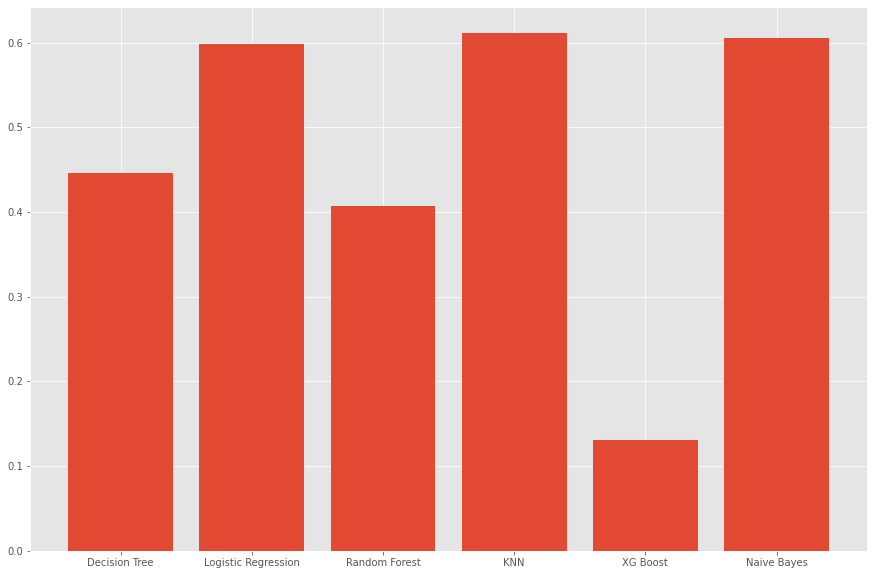

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(names,results)

In [ ]:
y_score1 = dtree.predict_proba(X_test)[:,1]
y_score2 = logre.predict_proba(X_test)[:,1]
y_score3 = RanFor.predict_proba(X_test)[:,1]
y_score4 = knn.predict_proba(X_test)[:,1]
y_score5 = svc.predict_proba(X_test)[:,1]
y_score6 = xgb_skl.predict_proba(X_test)[:,1]
y_score7 = gnb.predict_proba(X_test)[:,1]


In [ ]:
r_probs = [0 for _ in range(len(y_test))]

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score7)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
dtree_auc = roc_auc_score(y_test, y_score1)
logre_auc = roc_auc_score(y_test, y_score2)
RanFor_auc = roc_auc_score(y_test, y_score3)
knn_auc = roc_auc_score(y_test, y_score4)
svc_auc = roc_auc_score(y_test, y_score5)
xgb_skl_auc = roc_auc_score(y_test, y_score6)
gnb_auc = roc_auc_score(y_test, y_score7)

print('roc_auc_score for DecisionTree: ', dtree_auc)
print('roc_auc_score for Logistic Regression: ', logre_auc)
print('roc_auc_score for Random Forest: ', RanFor_auc)
print('roc_auc_score for KNN: ', knn_auc)
print('roc_auc_score for SVM: ', svc_auc)
print('roc_auc_score for XG Boost: ', xgb_skl_auc)
print('roc_auc_score for Naive Bayes: ', gnb_auc)

roc_auc_score for DecisionTree:  0.6009681905712859
roc_auc_score for Logistic Regression:  0.7199682618928749
roc_auc_score for Random Forest:  0.6177055844804222
roc_auc_score for KNN:  0.6291206048070751
roc_auc_score for SVM:  0.6753066828328935
roc_auc_score for XG Boost:  0.6263283645959632
roc_auc_score for Naive Bayes:  0.6944779259681906


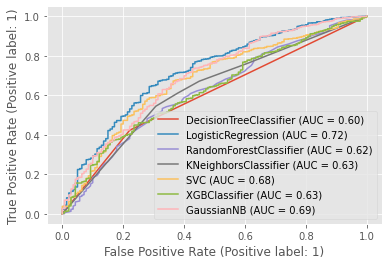

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

disp  = plot_roc_curve(dtree,X_test,y_test)
plot_roc_curve(logre,X_test,y_test, ax=disp.ax_)
plot_roc_curve(RanFor,X_test,y_test, ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test, ax=disp.ax_)
plot_roc_curve(xgb_skl,X_test,y_test, ax=disp.ax_)
plot_roc_curve(gnb,X_test,y_test, ax=disp.ax_)

# Results Comparison

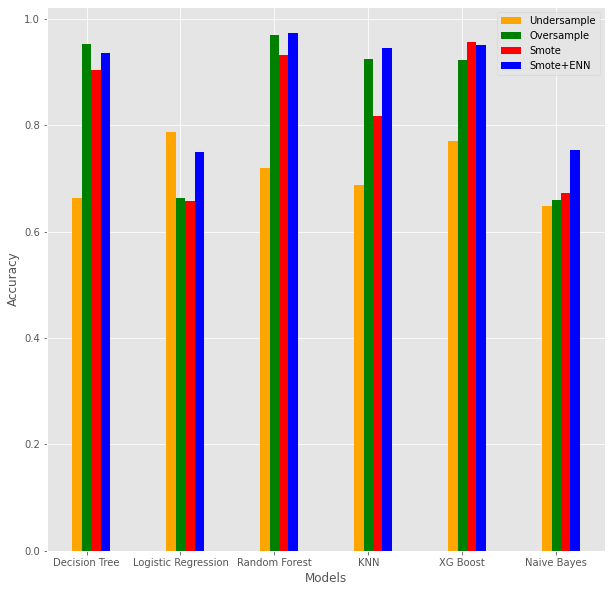

In [ ]:
labels = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'KNN', 'XG Boost', 'Naive Bayes']
#RAW = [dtree_0, logre_0, RanFor_0, knn_0,  xgb_skl_0, gnb_0]
Undersample = [dtree_1, logre_1, RanFor_1, knn_1,  xgb_skl_1, gnb_1]
Oversample = [dtree_2, logre_2, RanFor_2, knn_2,  xgb_skl_2, gnb_2]
Smote = [dtree_3, logre_3, RanFor_3, knn_3,  xgb_skl_3, gnb_3]
SmoteENN =[dtree_4, logre_4, RanFor_4, knn_4, xgb_skl_4, gnb_4]
plt.figure(figsize=(10,10))
width = 0.1
x = np.arange(len(labels))  
# plot data in grouped manner of bar type
#plt.bar(x-0.2, RAW, width, color='cyan')
plt.bar(x-0.1, Undersample, width, color='orange')
plt.bar(x, Oversample, width, color='green')
plt.bar(x+0.1, Smote, width, color='red')
plt.bar(x+0.2, SmoteENN, width, color='blue')
plt.xticks(x, labels)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Undersample", "Oversample", "Smote", "Smote+ENN"])
plt.show()